In [1]:
import numpy as np

from mereldet import Optimizer, function_under_test, MUT_SCALE, CostFunction
from matplotlib import pyplot as plt

In [2]:
def create_training_data(n=10_000, size=2):
    rng = np.random.default_rng(seed=1234)
    return rng.uniform(low=-1, high=1, size=(n, size))

In [3]:
def plot_convergence(optimizer):
    plt.loglog(optimizer.trace["iteration"], optimizer.trace["cost"], label="cost")
    plt.loglog(optimizer.trace["iteration"], optimizer.trace["mean_dist"], label="|f(g(x)) - f(x)|")
    plt.xlabel("Iteration count")
    plt.legend()

In [4]:
input = create_training_data()

CPU times: user 54.4 s, sys: 105 ms, total: 54.5 s
Wall time: 54.6 s


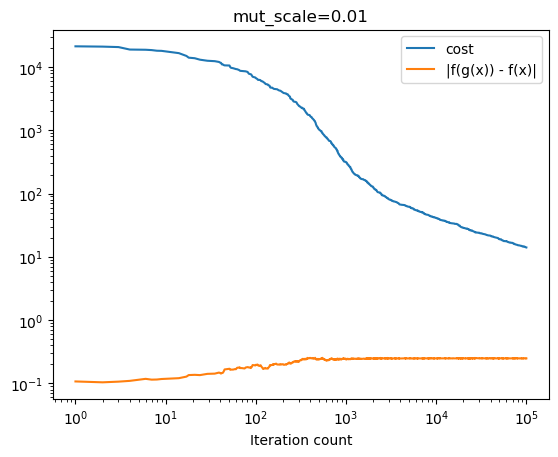

In [5]:
from mereldet import MRCandidate

cost_function = CostFunction(function_under_test["prod"], [MRCandidate.from_identity()])

optimizer = Optimizer(cost_function, input)
%time mr = optimizer.optimize(mut_scale=MUT_SCALE, timeout=100_000)
plot_convergence(optimizer)
plt.title(f"mut_scale={MUT_SCALE}");

CPU times: user 1min, sys: 117 ms, total: 1min
Wall time: 1min


Text(0.5, 1.0, 'mut_scale=0.001')

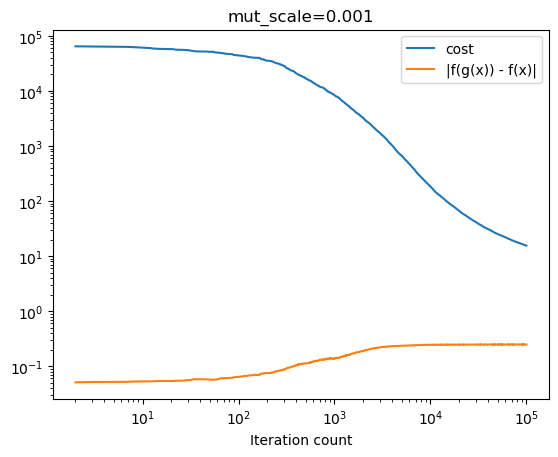

In [6]:
optimizer = Optimizer(cost_function, input)
%time mr = optimizer.optimize(mut_scale=1e-1 * MUT_SCALE, timeout=100_000)
plot_convergence(optimizer)
plt.title(f"mut_scale={1e-1 * MUT_SCALE}")

CPU times: user 1min 10s, sys: 770 ms, total: 1min 11s
Wall time: 1min 11s


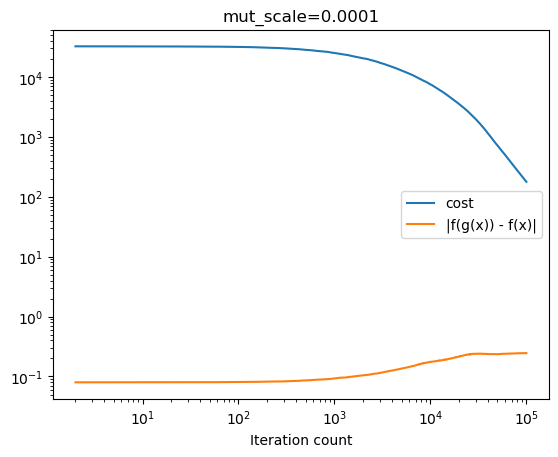

In [7]:
optimizer = Optimizer(cost_function, input)
%time mr = optimizer.optimize(mut_scale=1e-2 * MUT_SCALE, timeout=100_000)
plot_convergence(optimizer)
plt.title(f"mut_scale={1e-2 * MUT_SCALE}");

CPU times: user 55 s, sys: 3.21 s, total: 58.2 s
Wall time: 58.2 s


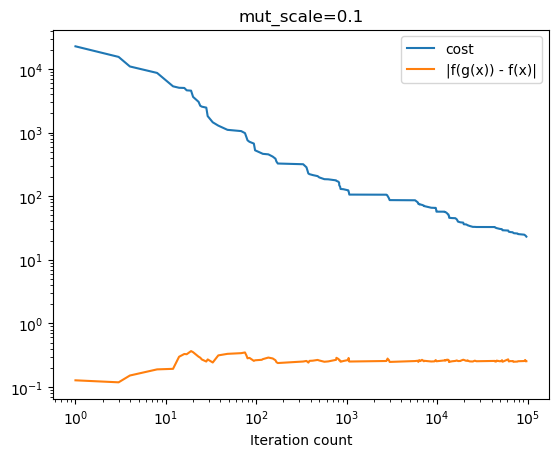

In [8]:
optimizer = Optimizer(cost_function, input)
%time mr = optimizer.optimize(mut_scale=10*MUT_SCALE, timeout=100_000)
plot_convergence(optimizer)
plt.title(f"mut_scale={1e1 * MUT_SCALE}");

In [9]:
mr.scale

array([[ 0.12007812,  0.43984455],
       [-0.00931137,  0.00321311]])

In [10]:
mr.bias

array([ 1.04630558e+01, -2.14334567e-03])

In [11]:
input[0]

array([ 0.95339953, -0.23960853])

In [12]:
mr(np.array([1, 1]))

array([ 1.10229785e+01, -8.24159856e-03])

In [13]:
test = np.array([1., 1.])
print(function_under_test["prod"](test))
print(function_under_test["prod"](mr(test)))

1.0
-0.09084696359489022
